# Imports

In [1]:
!pip install transformers sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00


# Hugged login

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from transformers import XLMRobertaForSequenceClassification, AutoTokenizer
import torch

model_name = "Jayveersinh-Raj/PolyGuard"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = XLMRobertaForSequenceClassification.from_pretrained(model_name)

# Inference on Guj and hindi test sets

In [4]:
from helper_utils import *

In [5]:
import pandas as pd
hi = pd.read_csv("/content/encoded_labels_hindi_tweets_test.csv")
guj = pd.read_csv("/content/gujarati_tweets_encoded.csv")

### Looking at the columns

In [7]:
hi.columns, guj.columns

(Index(['Sentences', 'encoded_labels'], dtype='object'),
 Index(['tweets', 'labels', 'encoded_labels'], dtype='object'))

### Inference

In [9]:
binary_infer(df = hi, column = "Sentences", model = model, tokenizer = tokenizer)
binary_infer(df = guj, column = "tweets", model = model, tokenizer = tokenizer)

Batch 1: 3.3017 seconds
Batch 2: 0.0214 seconds
Batch 3: 0.0223 seconds
Batch 4: 0.0284 seconds
Total time taken for the entire data: 3.3738 seconds
Batch 1: 0.0771 seconds
Batch 2: 0.0376 seconds
Total time taken for the entire data: 0.1147 seconds


# Viewing after inference the dataframe

In [10]:
hi.head()

,Sentences,encoded_labels,pred_lab
0,के जरिए केन्द्र सरकार दिल्ली के विकास में रोड़...,0,0
1,बीजेपी को तो कभी मुसलमानो ने अपना माना नहीक्या...,0,0
2,बी जे पी सरकार मे शिक्षा मित्रो की दुर्गति हो ...,0,0
3,अब लड़ाई कॉंग्रेस और बीजेपी में नहीं रही अब ल...,0,0
4,राजस्थान उपचुनाव नतीजे राजस्थान में कांग्रेस ...,0,0


In [11]:
guj.head()

,tweets,labels,encoded_labels,pred_lab
0,@username @username ઇ વાયડાઈ ના તું હાઈસ ડોબો ...,HOF,1,0
1,@username @username આવા હલકા કેટલા છે કાય ખબર ...,HOF,1,0
2,@username @username તારી જેમ અમે જ્ઞાતિ માં બટ...,HOF,1,1
3,@username આવું વાહિયાત ખાવા વાળા લોકો પણ છે 😈😈...,NOT,0,0
4,"@username @username બેશક, હું તમને મૂર્ખ કહી શ...",NOT,0,0


# Evaluation of hindi

## Confusion matrix

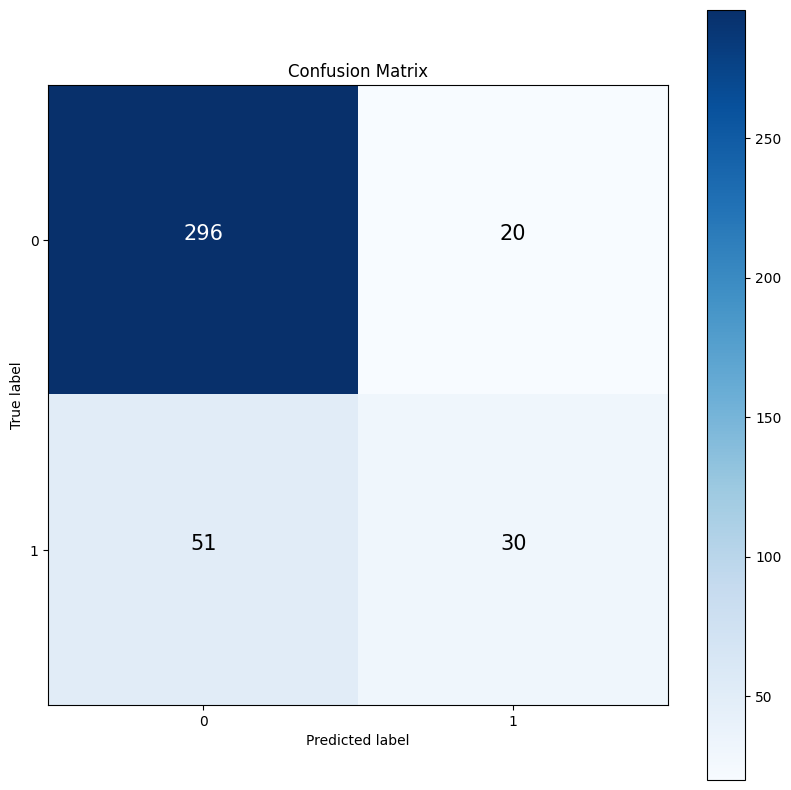

In [12]:
make_confusion_matrix(y_true = hi["encoded_labels"], y_pred = hi["pred_lab"])

## Top -1 accuracy

In [13]:
top_1_accuracy(y_true = hi["encoded_labels"], y_pred = hi["pred_lab"])

0.8211586901763224

# F1, Precison, Recall

In [17]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

precision = precision_score(hi['encoded_labels'], hi['pred_lab'])
recall = recall_score(hi['encoded_labels'], hi['pred_lab'])
f1score = f1_score(hi['encoded_labels'], hi['pred_lab'])

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.6
Recall = 0.37037037037037035
F1 Score = 0.4580152671755725


# Same for Gujarati

## Confusion matrix

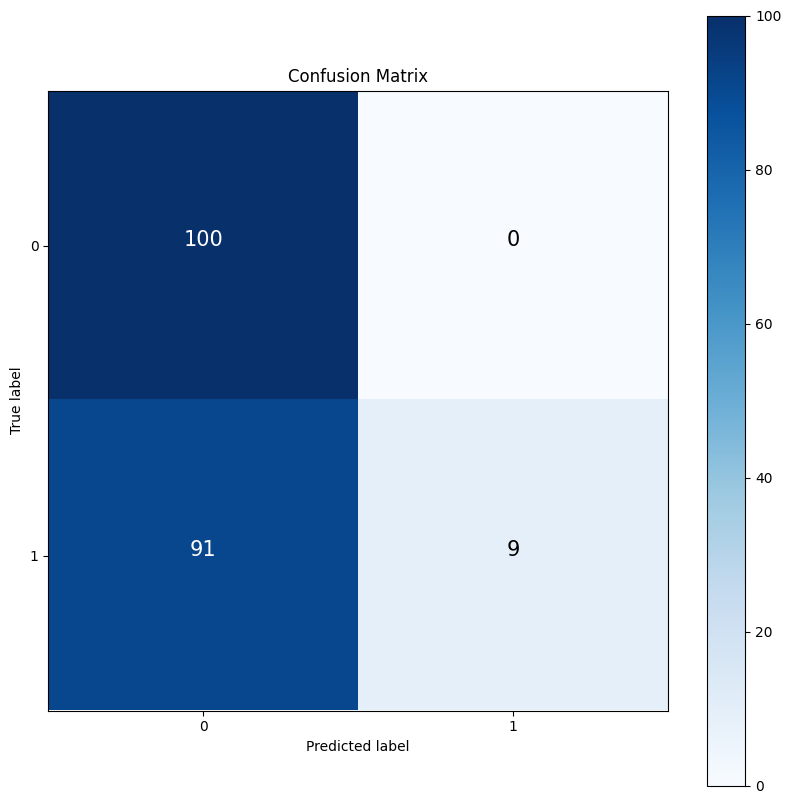

In [19]:
make_confusion_matrix(y_true = guj["encoded_labels"], y_pred = guj["pred_lab"])

## Top-1 accuracy

In [20]:
top_1_accuracy(y_true = guj["encoded_labels"], y_pred = guj["pred_lab"])

0.545

In [21]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

precision = precision_score(guj['encoded_labels'], guj['pred_lab'])
recall = recall_score(guj['encoded_labels'], guj['pred_lab'])
f1score = f1_score(guj['encoded_labels'], guj['pred_lab'])

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 1.0
Recall = 0.09
F1 Score = 0.16513761467889906
